## Урок 3
### Описательная статистика. Качественные и количественные характеристики популяции. 
### Графическое представление данных.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Задача 1
Даны значения зарплат из выборки выпускников:

`100`, `80`, `75`, `77`, `89`, `33`, `45`, `25`, `65`, `17`, `30`, `230`, `24`, `57`, `55`, `70`, `75`, `65`, `84`, `90`, `150`

Своими руками (т.е. без использования статистических функций вроде `mean`, `std`, `var`) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

##### Решение

In [2]:
graduate_salaries = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [3]:
# Calculate mean value manually
salaries_mean = graduate_salaries.sum() / graduate_salaries.size
salaries_mean

73.14285714285714

In [4]:
# Calculate mean value using built-in function
graduate_salaries.mean()

73.14285714285714

In [5]:
# Calculate dispersion manually
salaries_variance = ((graduate_salaries - salaries_mean) ** 2).sum() / graduate_salaries.size
salaries_variance

2135.0748299319725

In [6]:
# Calculate dispersion using built-in function
graduate_salaries.var()

2135.0748299319725

In [7]:
# Calculate unbiased dispersion manually
salaries_variance_unbiased = ((graduate_salaries - salaries_mean) ** 2).sum() / (graduate_salaries.size - 1)
salaries_variance_unbiased

2241.828571428571

In [8]:
# Calculate unbiased dispersion using built-in function with ddof (Delta Degrees of Freedom)
graduate_salaries.var(ddof=1)

2241.828571428571

In [9]:
# Calculate unbiased standard deviation manually
salaries_std_unbiased = np.sqrt(salaries_variance_unbiased)
salaries_std_unbiased

47.347952135531386

In [10]:
# Calculate unbiased standard deviation using built-in function with ddof (Delta Degrees of Freedom)
graduate_salaries.std(ddof=1)

47.347952135531386

#### Задача 2
Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выбросы в выборке, используя для этого "усы" из `boxplot`.

В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.

##### Решение

In [11]:
salaries = pd.Series(graduate_salaries)
len(salaries)

21

In [12]:
# The number of elements (21) is odd, let's get the index of the median element:
len(salaries) // 2 + 1

11

In [13]:
# Calculate median value manually - get 11th element
salaries_sorted = sorted(salaries)
q2 = salaries_sorted[10]
q2

70

In [14]:
# Calculate median value using built-in function
salaries.median()

70.0

In [15]:
# Get the index of the 1st quartile element:
len(salaries) // 4 + 1

6

In [16]:
# Calculate 1st quartile value manually - get 6th element
q1 = salaries_sorted[5]
q1

45

In [17]:
# Get the index of the 3rd quartile element:
len(salaries) // 4 * 3 + 1

16

In [18]:
# Calculate 3rd quartile value manually - get 16th element
q3 = salaries_sorted[15]
q3

84

In [19]:
# Calculate 1st quartile (0.25), 2nd quartile (0.5), and 3rd quartile (0.75) values using built-in function
salaries.quantile([0.25, 0.5, 0.75])

0.25    45.0
0.50    70.0
0.75    84.0
dtype: float64

In [20]:
# Calculate interquartile range
iqr = q3 - q1
iqr

39

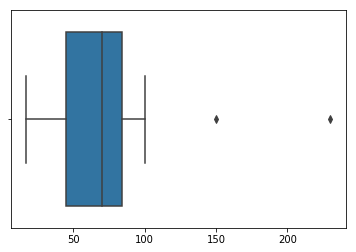

In [21]:
sns.boxplot(salaries)

In [22]:
min_non_outlier = q1 - 1.5 * iqr
max_non_outlier = q3 + 1.5 * iqr
print("Lower (minimum) non-outlier: {}".format(min_non_outlier))
print("Higher (maximum) non-outlier: {}".format(max_non_outlier))

Lower (minimum) non-outlier: -13.5
Higher (maximum) non-outlier: 142.5


In [23]:
lower_outliers = salaries[salaries < min_non_outlier]
higher_outliers = salaries[salaries > max_non_outlier]
lower_outliers
higher_outliers 
print("Lower outliers:\n{}".format(lower_outliers))
print("Higher outliers:\n{}".format(higher_outliers))

Lower outliers:
Series([], dtype: int64)
Higher outliers:
11    230
20    150
dtype: int64


#### Задача 3
В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна `0.8`. Для студента факультета `B` эта вероятность равна `0.7`, а для студента факультета `C` - `0.9`. Студент сдал первую сессию. 

Какова вероятность, что он учится: 
a) на факультете `A`? 
б) на факультете `B`? 
в) на факультете `C`?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#### Решение